In [ ]:
# 필요한 패키지 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
from os.path import join

In [ ]:
abalone_path = join('.', 'abalone.txt')     # 같은 경로의 'abalone.txt'의 주소를 저장
column_path = join('.', 'abalone_attributes.txt')

In [ ]:
abalone_columns = list()
for line in open(column_path):
    abalone_columns.append(line.strip())

abalone_columns

In [ ]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
data

In [ ]:
label = data['Sex']
del data['Sex']        # 우리는 다른 특성들을 이용해 성별을 예측하는 것이 목표이므로 성별 컬럼을 떼어놓음

In [ ]:
print(label)
print(data)


In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
# Scaling

# data = (data - np.min(data)) / (np.max(data) - np.min(data))
# data      # 모든 수치들이 0~1 사이의 비례값으로 변화된 것을 볼 수 있음 (정규화 됨)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()

#fit() - 스케일러를 적용해서 데이터를 확인해보는 기능(피팅 해본다)
mMscaler.fit(data)

#transform() - 피팅해본 스케일러를 실제로 자료에 적용하는 기능(Numpy 배열로 출력해줌)
mScaled_data = mMscaler.transform(data)
mScaled_data

In [ ]:
# Numpy에서 DataFrame으로 전환
mScaled_data = pd.DataFrame(mScaled_data, columns=data.columns)
mScaled_data

In [ ]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

sdscaled_data = sdscaler.fit_transform(data)

In [ ]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data

In [ ]:
# Sampling - 데이터 비교 시에 수량(쪽수?)의 차이로 인한 격차를 줄이기 위한 방식

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [ ]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
undersampled_data, undersampled_label = rus.fit_resample(data, label)

oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

In [ ]:
print('원본 데이터의클래스 비율: \n{}'.format(pd.get_dummies(label).sum()))
print('오버샘플링 데이터의클래스 비율: \n{}'.format(pd.get_dummies(oversampled_label).sum()))
print('언더샘플링 데이터의클래스 비율: \n{}'.format(pd.get_dummies(undersampled_label).sum()))

하지만 Oversampling은 과적합 문제, Undersampling은 데이터 손실의 문제가 있어, SMOTE 알고리즘을 개발함.

SMOTE? - 뭉친 데이터와 좀 떨어진 데이터 사이의 공간을 채워주어 데이터 편향(과적합)을 줄여줌

In [ ]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000,
                    n_features=2
                    ,n_redundant=0,
                    n_informative=2,
                    n_repeated=0,
                    n_classes=3
                    ,n_clusters_per_class=1,
                    weights=[0.05,0.15,0.8],
                    class_sep=0.8,
                    random_state=2019)

In [ ]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(data[:,0],data[:,1],c=label,alpha=0.3)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
smoted_data ,smoted_label = smote.fit_resample(data, label)

print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

In [ ]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:,0],smoted_data[:,1],c=smoted_label,alpha=0.3)

In [ ]:
# 차원의 축소

from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.DESCR)

In [ ]:
data = digits.data
label = digits.target

In [ ]:
print(data.shape)   # 8*8 pixel 내의 위치와 해당 위치이 컬러값이 들어있을 것
print(label) 
print(label.shape)

In [ ]:
data[0] #이미지가 가로로 쭉 펼쳐져 있는 상태

In [ ]:
data[0].reshape(8,8)    #가로 64짜리 데이터를 (8,8)로 변경

In [ ]:
label[0]

Label: 0


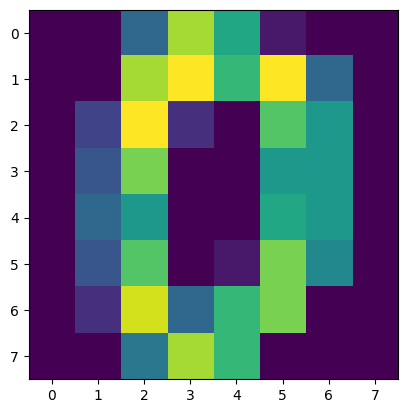

In [57]:
plt.imshow(data[0].reshape((8,8)))
print('Label: {}'.format(label[0]))

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [59]:
new_data = pca.fit_transform(data)

In [60]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA를 거친 데이터의 차원 
(1797, 2)


In [61]:
new_data[0]

array([-1.25946905, 21.27488357])

In [62]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


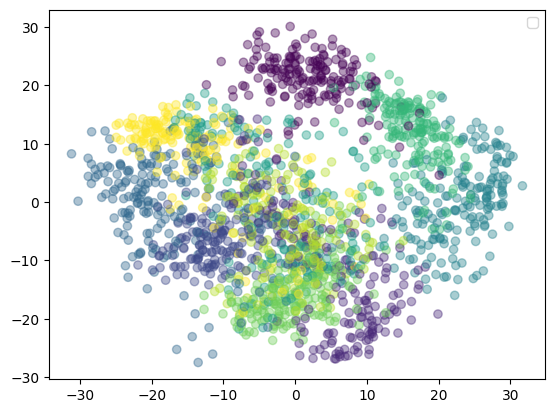

In [67]:
plt.scatter(new_data[:,0],new_data[:,1],c=label, alpha=0.4)
plt.legend()

In [70]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
label_encoded_label = le.fit_transform(label)
label_encoded_label

array([2, 2, 0, ..., 2, 0, 2])

In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # True로 하면 Maxrix로 출력하므로 표시가 안된다

one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))

In [80]:
one_hot_encoded # M,F,I의 3종류 데이터이므로 3방향 벡터로 표시

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])